<a href="https://colab.research.google.com/github/Driseri/GenderNN/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D0%93%D0%B5%D0%BD%D0%B4%D0%B5%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [336]:
data = pd.read_csv('gender_classification_v7.csv')

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [338]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [339]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [340]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [342]:
# Масштабирование данных
scaler = StandardScaler()
# data[['forehead_width_cm', 'forehead_height_cm']] = scaler.fit_transform(data[['forehead_width_cm', 'forehead_height_cm']])
# Преобразование категориального столбца 'gender' в числовой формат
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

In [343]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


PCA (Principal Component Analysis) - это метод снижения размерности данных, который используется для выявления главных компонентов в многомерном пространстве. Он наиболее часто применяется для анализа и визуализации данных.

Принцип работы метода PCA заключается в проекции исходных данных на новые ортогональные оси (главные компоненты), таким образом, каждая ось представляет собой линейную комбинацию исходных признаков. Главные компоненты упорядочиваются по убыванию доли объясненной дисперсии, что позволяет выделить наиболее значимые признаки данных.

# 2-Мерный PCA

In [344]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

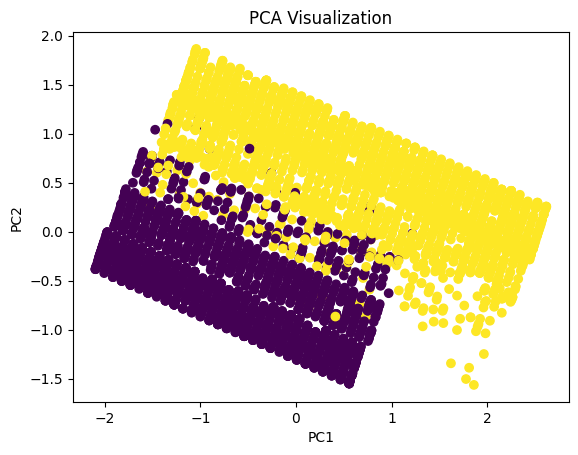

In [363]:
# Выделение признаков и целевой переменной
X = data.drop('gender', axis=1)
y = data['gender']
# Применение метода PCA для снижения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация данных
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

# 3-мерный PCA

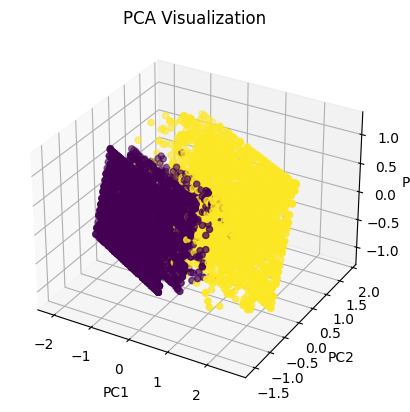

In [367]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Выделение признаков и целевой переменной
X = data.drop('gender', axis=1)
y = data['gender']

# Применение метода PCA для снижения размерности
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Визуализация данных
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Visualization')

plt.show()


LLE (Locally Linear Embedding): Этот метод пытается найти линейные зависимости между близкими точками данных и строит низкоразмерное представление, сохраняющее эти локальные связи.

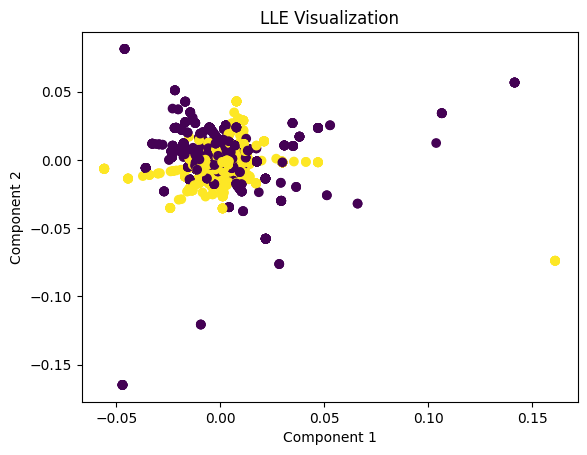

In [373]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Выделение признаков и целевой переменной
X = data.drop('gender', axis=1)
y = data['gender']

# Применение метода LLE для снижения размерности
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
X_lle = lle.fit_transform(X)

# Визуализация данных
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LLE Visualization')
plt.show()

# Полносвязная нейронная сеть:

In [346]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [347]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [348]:
# Выделение признаков и целевой переменной
X = data.drop('gender', axis=1)
y = data['gender']
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Масштабирование данных
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [349]:
# Создание модели полносвязанной нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [350]:
# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.9025 - val_loss: 0.1242 - val_accuracy: 0.9510
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9535 - val_loss: 0.1043 - val_accuracy: 0.9530
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9517 - val_loss: 0.1014 - val_accuracy: 0.9500
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9523 - val_loss: 0.1058 - val_accuracy: 0.9520
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0979 - accuracy: 0.9538 - val_loss: 0.1068 - val_accuracy: 0.9520
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9540 - val_loss: 0.1020 - val_accuracy: 0.9510
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9555 - val_loss: 0.1060 - val_accuracy: 0.9540
Epoch 

In [351]:
# Оценка точности классификации на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9550
Accuracy: 0.9550449848175049


In [352]:
y_test

1501    1
2586    0
2653    0
1055    1
705     1
       ..
2313    0
3214    1
2732    0
1926    1
4227    0
Name: gender, Length: 1001, dtype: int64

In [353]:
X_new_ME = np.array([[ 1, 11, 6,  1,  0, 1, 1 ]])

predictions = model.predict(X_new_ME)

1/1 [==============================] - 0s 68ms/step


In [354]:
print('Я Мужчина') if predictions[0][0] > 0.5   else print('Я сменил пол')

Я Мужчина


In [355]:
X_new_Woman = np.array([[ 0, 14, 5.4,  0, 0, 1, 0 ]])

predictions_woman = model.predict(X_new_Woman)
predictions_woman

1/1 [==============================] - 0s 71ms/step


array([[0.0683548]], dtype=float32)

In [356]:
predictions_woman

array([[0.0683548]], dtype=float32)

In [357]:
print('ВОТ это женщина') if predictions_woman[0][0] < 0.5   else print('МДААА, это не женщина')

ВОТ это женщина


# Сверточная нейронная сеть

In [358]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [359]:
# Создаем экземпляр модели
model_conv = Sequential()

# Добавляем сверточный слой
model_conv.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7, 1)))

# Добавляем слой пулинга
model_conv.add(MaxPooling1D(pool_size=2))

# Преобразуем многомерный выход сверточного слоя в одномерный
model_conv.add(Flatten())

# Добавляем полносвязные слои
model_conv.add(Dense(64, activation='relu'))
model_conv.add(Dense(1, activation='sigmoid'))

In [360]:
# Компилируем модель
model_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [361]:
# Обучаем модель
model_conv.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8723
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9515
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9525
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9548
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9542
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9545
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9540
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9542
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9545
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9540

In [362]:
# Оценка точности классификации на тестовых данных
loss, accuracy = model_conv.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9620
Accuracy: 0.962037980556488
